# Project 2

Griffith Stites and Becca Suchower

# Question
## How does the amount of sleep in a population affect the spread of illness throughout that population?

Several studies have linked immune system activity to amount of sleep.  An inappropriate amount of sleep - either too little or too much - can weaken the immune system. This can make it easier for individuals to become infected by a sickness. This model aims to determine how having different percentages of the population with different amounts of sleep affects the spread of a sickness accross that population.



We based our assumptions on a study from 2012, titled "A Prospective Study of Sleep Duration and Pneumonia Risk in Women" (https://academic.oup.com/sleep/article/35/1/97/2453920).

This study recorded the average nightly hours of sleep from ≤ 5, 6, 7, 8, and ≥ 9 hours.  The number of participants for each sleep category was recorded, along with the number of pneumonia cases for each group.

Using this data, we assumed that immune system function and sleep duration were linked.

Table 1: https://academic.oup.com/view-large/77947225

Table 2: https://academic.oup.com/view-large/77947227

Importing all of the necessary libraries. The normal matplotlib inline and modsim libraries are imported. 

There are also some specific matplotlib libraries imported to support the Matlab-like plotting functions (pyplot).

In [81]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# import matlab like plotting functions
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure

# Model

This model relies on a lot of stocks (11 to be specific). There are susceptible and infected stocks for all sleep values, because the contact rate is different for each. There is one recovered stock for all recovered individuals.

In [82]:
def make_system(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, infectedInitial, beta5, beta6, beta7, beta8, beta9, beta, gamma):
    """Make a system object for the SIR model.
    
    sleepFive: Percentage of the population with five or less hours of sleep
    sleepSix: Percentage of the population with six hours of sleep
    sleepSeven: Percentage of the population with seven hours of sleep
    sleepEight: Percentage of the population with eight hours of sleep
    sleepNine: Percentage of the population with nine or more hours of sleep
    infectedInitial: Percentage of the population that starts out infected
    
    beta5: contact rate multiplier in for five hours of sleep
    beta6: contact rate multiplier for six hours of sleep
    beta7: contact rate multiplier for seven hours of sleep
    beta8: contact rate multiplier for eight hours of sleep
    beta9: contact rate multiplier for nine hours of sleep
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    TotalPopulation = 1000
    SusceptiblePopulation = 1000 - (initialInfected * TotalPopulation)
    
    S5 = sleepFive * SusceptiblePopulation
    S6 = sleepSix * SusceptiblePopulation
    S7 = sleepSeven * SusceptiblePopulation
    S8 = sleepEight * SusceptiblePopulation
    S9 = sleepNine *  SusceptiblePopulation 
    
    I5 = sleepFive * TotalPopulation * infectedInitial
    I6 = sleepSix * TotalPopulation * infectedInitial
    I7 = sleepSeven * TotalPopulation * infectedInitial
    I8 = sleepEight * TotalPopulation * infectedInitial
    I9 = sleepNine * TotalPopulation * infectedInitial
    
    init = State(S5=S5, S6=S6, S7=S7, S8=S8, S9=S9, 
                 I5=I5, I6=I6, I7=I7, I8=I8, I9=I9, 
                 R=0)
    init /= np.sum(init)
    
    #Time in days
    t0 = 0
    t_end = 100 
    

    return System(init=init, t0=t0, t_end=t_end,
                  beta5=beta5, beta6=beta6, beta7=beta7, beta8=beta8, beta9=beta9,
                  beta=beta, gamma=gamma)

The plot_results function plots the results of a SIR model and a pie chart of the population background side by side.

In [83]:
def plot_results(results, sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, title):
    """Plot the results of a SIR model and a pie chart of the population breakdown.
    
    results: Dataframe with the results of the model
    sleepFive: Fraction of population with five hours of sleep
    sleepSix: Fraction of population with six hours of sleep
    sleepSeven: Fraction of population with seven hours of sleep
    sleepEight: Fraction of popultaion with eight hours of sleep
    sleepNine: Fraction of population with nine hours of sleep"""
    TotalSusceptible = results.S5 + results.S6 + results.S7 + results.S8 + results.S9
    TotalInfected = results.I5 + results.I6 + results.I7 + results.I8 + results.I9
    
    #Changes the size of the figure
    figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
    #Changes the font of the figure
    font = {'family' : 'DejaVu Sans',
            'weight' : 'normal',
            'size'   : 30}
    matplotlib.rc('font', **font)

    #Creates the SIR plot
    plt.subplot(1, 2, 1)
    plt.plot(results.index, results.R, color='lightgreen', linewidth=7.0)
    plt.plot(results.index, TotalSusceptible, color='coral', linewidth=7.0)
    plt.plot(results.index, TotalInfected, color='lightblue', linewidth=7.0)
    plt.title(title, fontsize = 40)
    plt.xlabel('Time (Days)', fontsize = 20)
    plt.ylabel('Population (Fraction of Population)', fontsize = 20)
    
    #The following four lines create the legend for the graph. This graph had to be clearly defined, otherwise it just labels the first line
    RLabel = mpatches.Patch(color='lightgreen', label='Recovered')
    SLabel = mpatches.Patch(color='coral', label='Susceptible')
    ILabel = mpatches.Patch(color='lightblue', label='Infected')
    plt.legend(handles=[RLabel, SLabel, ILabel])
    
    #Creates the pie plot
    plt.subplot(1, 2, 2)
    labels = '5 Hours', '6 Hours', '7 Hours', '8 Hours', '9 Hours'
    sizes = [sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue' , 'yellow']
    explode = (0, 0, 0, 0.1, 0)  # explode fourth slice
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title('Population Sleep Breakdown', fontsize = 40)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()

The analyze_results_infected function shows the fraction of each susceptible sleep group that is infected at any given time. The function also prints out the percent of each group that was infected over the course of the simulation.
This makes it easier for a reader of our Modeling project to see the correlation between how much sleep they get and their chances of getting sick (opposed to just how it effects the collective).

Mathmatically this is computated by taking the number of people in a group infected at any time divided by the total number of people that started in that group.

In [84]:
def analyze_results_infected(results, title):
    """Plot the fraction of each group that is infected at any given time.
    
    results: Dataframe with the results of the model"""
    
    #Changes the size of the figure
    figure(num=None, figsize=(20, 7), dpi=80, facecolor='w', edgecolor='k')
    #Changes the font of the figure
    font = {'family' : 'DejaVu Sans',
            'weight' : 'normal',
            'size'   : 30}
    matplotlib.rc('font', **font)
    
    plt.subplot(1, 2, 1)
    plt.plot(results.index, results.I5/(get_first_value(results.S5)), color='lightgreen', linewidth=1.0)
    plt.plot(results.index, results.I6/(get_first_value(results.S6)), color='coral', linewidth=1.0)
    plt.plot(results.index, results.I7/(get_first_value(results.S7)), color='lightblue', linewidth=1.0)
    plt.plot(results.index, results.I8/(get_first_value(results.S8)), color='green', linewidth=1.0)
    plt.plot(results.index, results.I9/(get_first_value(results.I9)+get_first_value(results.S9)), color='blue', linewidth=1.0)
    plt.title(title + ' - Fraction Infected', fontsize = 40)
    plt.xlabel('Time (Days)', fontsize = 20)
    plt.ylabel('Fraction of group Infected', fontsize = 20)
    
    #The following four lines create the legend for the graph. This graph had to be clearly defined, otherwise it just labels the first line
    I5Label = mpatches.Patch(color='lightgreen', label='I5')
    I6Label = mpatches.Patch(color='coral', label='I6')
    I7Label = mpatches.Patch(color='lightblue', label='I7')
    I8Label = mpatches.Patch(color='green', label='I8')
    I9Label = mpatches.Patch(color='blue', label='I9')
    plt.legend(handles=[I5Label, I6Label, I7Label, I8Label, I9Label])
    
    plt.show()
    
    #Print the percent of each group that was infected over the course of the simulation
    total_5 = str(round(((get_first_value(results.S5) - get_last_value(results.S5)) * 100), 2))
    print('\x1b[1;31m'+'The percentage of the 5 hour of sleep population that was infected at any point was'+'\x1b[0m', 
          '\x1b[1;31m'+ total_5 +'\x1b[0m', '\x1b[1;31m'+'%'+'\x1b[0m')
    total_6 = str(round(((get_first_value(results.S6) - get_last_value(results.S6)) * 100), 2))
    print('\x1b[1;31m'+'The percentage of the 6 hour of sleep population that was infected at any point was'+'\x1b[0m', 
          '\x1b[1;31m'+ total_6 +'\x1b[0m', '\x1b[1;31m'+'%'+'\x1b[0m')    
    total_7 = str(round(((get_first_value(results.S7) - get_last_value(results.S7)) * 100), 2))
    print('\x1b[1;31m'+'The percentage of the 7 hour of sleep population that was infected at any point was'+'\x1b[0m', 
          '\x1b[1;31m'+ total_7 +'\x1b[0m', '\x1b[1;31m'+'%'+'\x1b[0m')
    total_8 = str(round(((get_first_value(results.S8) - get_last_value(results.S8)) * 100), 2))
    print('\x1b[1;31m'+'The percentage of the 8 hour of sleep population that was infected at any point was'+'\x1b[0m', 
          '\x1b[1;31m'+ total_8 +'\x1b[0m', '\x1b[1;31m'+'%'+'\x1b[0m')
    total_9 = str(round(((get_first_value(results.S9) - get_last_value(results.S9)) * 100), 2))
    print('\x1b[1;31m'+'The percentage of the 9 hour of sleep population that was infected at any point was'+'\x1b[0m', 
          '\x1b[1;31m'+ total_9 +'\x1b[0m', '\x1b[1;31m'+'%'+'\x1b[0m')

The calc_total_infected function calculates and returns the total number of people infected during the course of the simulation.

In [85]:
def calc_total_infected(results):
    """Fraction of population infected during the simulation.
    
    results: DataFrame
    """
    TotalSusceptible = results.S5 + results.S6 + results.S7 + results.S8 + results.S9
    total_infected = round(get_first_value(TotalSusceptible) - get_last_value(TotalSusceptible), 4)
    #Converts total_infected to a string
    total_infected_str = str(total_infected * 100)
    print('\x1b[1;31m'+'The total percentage of the population that was infected at any point was'+'\x1b[0m', 
          '\x1b[1;31m'+ total_infected_str +'\x1b[0m', '\x1b[1;31m'+'%'+'\x1b[0m')

The below cell contains values for the percentage of people in each sleep group, taken from the 2012 study.  It also includes the contact rate multiplier for each group, which is the Age-Adjusted Relative Risk value from the study.

The make_system function is used to make a system. Having the make_system function makes it easier to change the size of each sleep group and the initialInfected.

In [86]:
sleepFive = 0.052
sleepSix = 0.233
sleepSeven = 0.427
sleepNine = 0.05
sleepEight = 1 - sleepFive - sleepSix - sleepSeven - sleepNine
initialInfected = 1/90

beta5 = 1.7 #contact rate multiplier in for five hours of sleep
beta6 = 1.29 #contact rate multiplier for six hours of sleep
beta7 = 1.15 #contact rate multiplier for seven hours of sleep
beta8 = 1.0 #contact rate multiplier for eight hours of sleep
beta9 = 1.49 #contact rate multiplier for nine hours of sleep
beta = 0.333
gamma = 0.25
system = make_system(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, initialInfected, beta5, beta6, beta7, beta8, beta9, beta, gamma)

,values
init,S5 0.051422 S6 0.230411 S7 0.422256 S...
t0,0
t_end,100
beta5,1.7
beta6,1.29
beta7,1.15
beta8,1
beta9,1.49
beta,0.333
gamma,0.25


Our update function contains the generic differential equations for our model:

ds/dt = -beta<sub>#</sub> * i * s<sub>#</sub>

di/dt = beta<sub>#</sub> * i * s<sub>#</sub> - gamma * i<sub>#</sub>

where # represents the different values for each of the sleep groups (5 or less, 6, 7, 8, 9 or more).

In [87]:
def update_func(state, dt, system):
    """Update the SIR model.
    
    state: State (s5, s6, s7, s8, s9, i5, i6, i7, i8, i9, r)
    t: time
    system: System object
    
    returns: pair of derivatives
    """ 
    s5, s6, s7, s8, s9, i5, i6, i7, i8, i9, r = state
    unpack(system)
    
    s = s5 + s6 + s7 + s8 + s9 # Total susceptible
    i = i5 + i6 + i7 + i8 + i9 # Total infected
    
    
    #VERIFY: Check: total change in infected = -(total change in susceptible) - (total change in recovered)
    s5 += (-(beta*beta5) * i * (s5)) * dt 
    i5 += ((beta*beta5) * i * (s5) - gamma * i5) * dt 
    
    s6 += (-(beta*beta6) * i * (s6)) * dt
    i6 += ((beta*beta6) * i * (s6) - gamma * i6) * dt
    
    s7 += (-(beta*beta7) * i * (s7)) * dt
    i7 += ((beta*beta7) * i * (s7) - gamma * i7) * dt
    
    s8 += (-(beta*beta8) * i * (s8)) * dt
    i8 += ((beta*beta8) * i * (s8) - gamma * i8) * dt
    
    s9 += (-(beta*beta9) * i * (s9)) * dt
    i9 += ((beta*beta9) * i * (s9) - gamma * i9) * dt

    r += (gamma * i) * dt
    
    return State(S5 = s5, I5=i5, S6=s6, I6=i6, S7=s7, I7=i7, S8=s8, I8=i8, S9=s9, I9=i9, R=r)

In [88]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    dt = .1
    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], dt, system)
    
    return frame

# Results

#### The below graph shows the SIR model where everyone has 8 hours of sleep. This is used a benchmark as a best case scenerio.

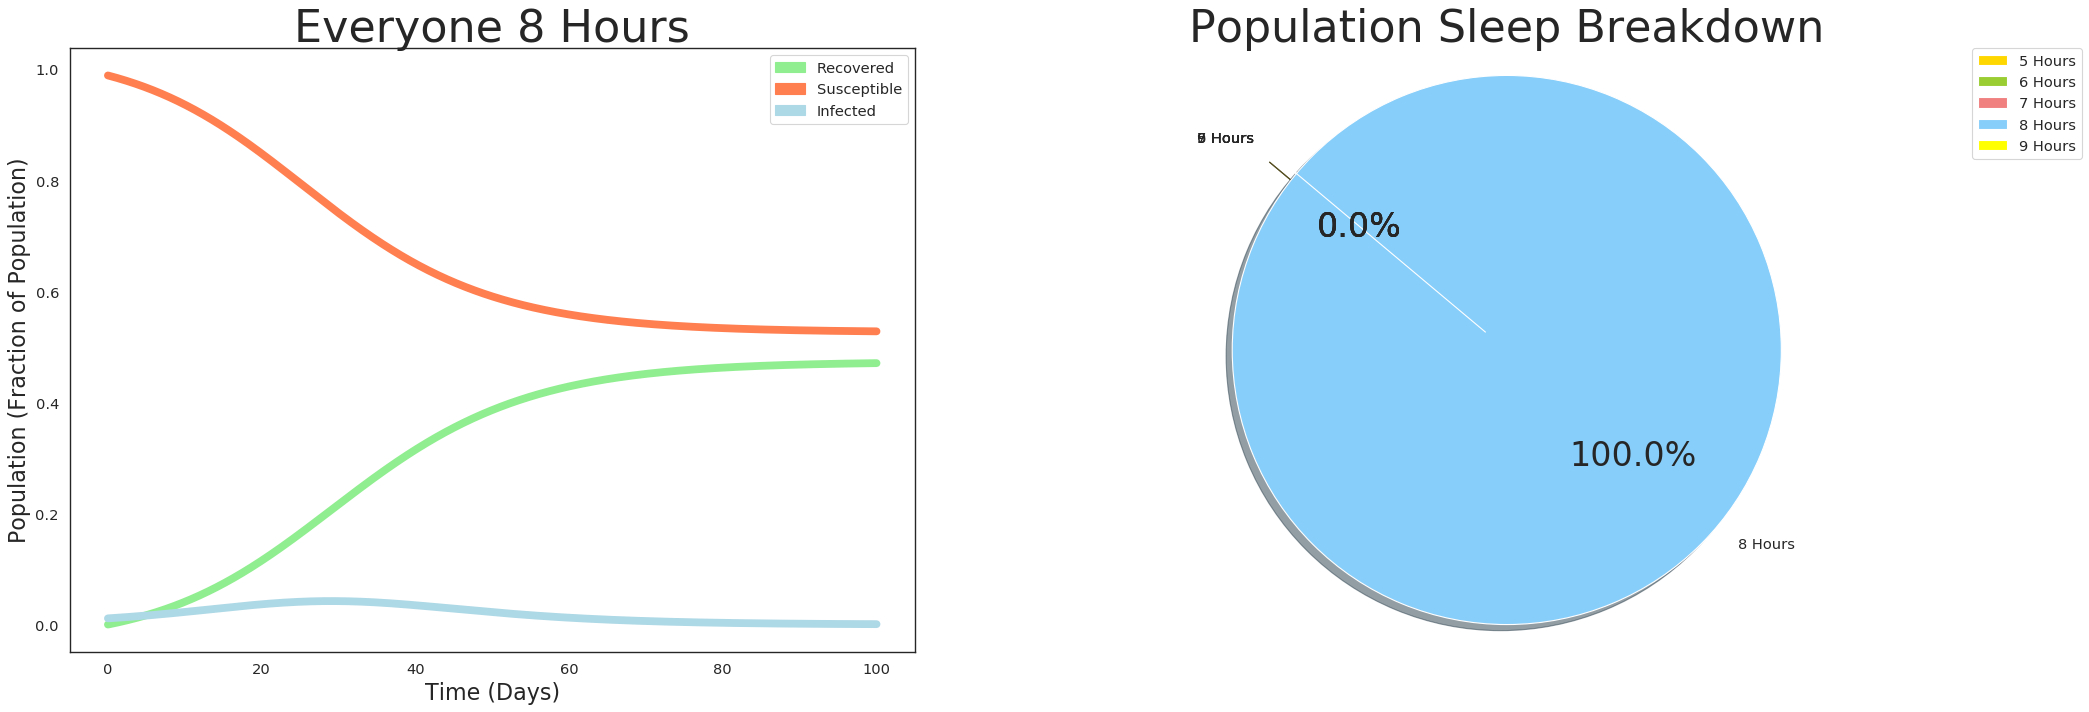

The total percentage of the population that was infected at any point was 46.08 %


In [89]:
sleepFive = 0
sleepSix = 0
sleepSeven = 0
sleepNine = 0
sleepEight = 1 - sleepFive - sleepSix - sleepSeven - sleepNine
system = make_system(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, initialInfected, beta5, beta6, beta7, beta8, beta9, beta, gamma)

results = run_simulation(system, update_func)
plot_results(results, sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, 'Everyone 8 Hours')
calc_total_infected(results)

#### The below graph shows the SIR model where everyone has 5 or less hours of sleep. This is used as a benchmark as a worst case scenerio.

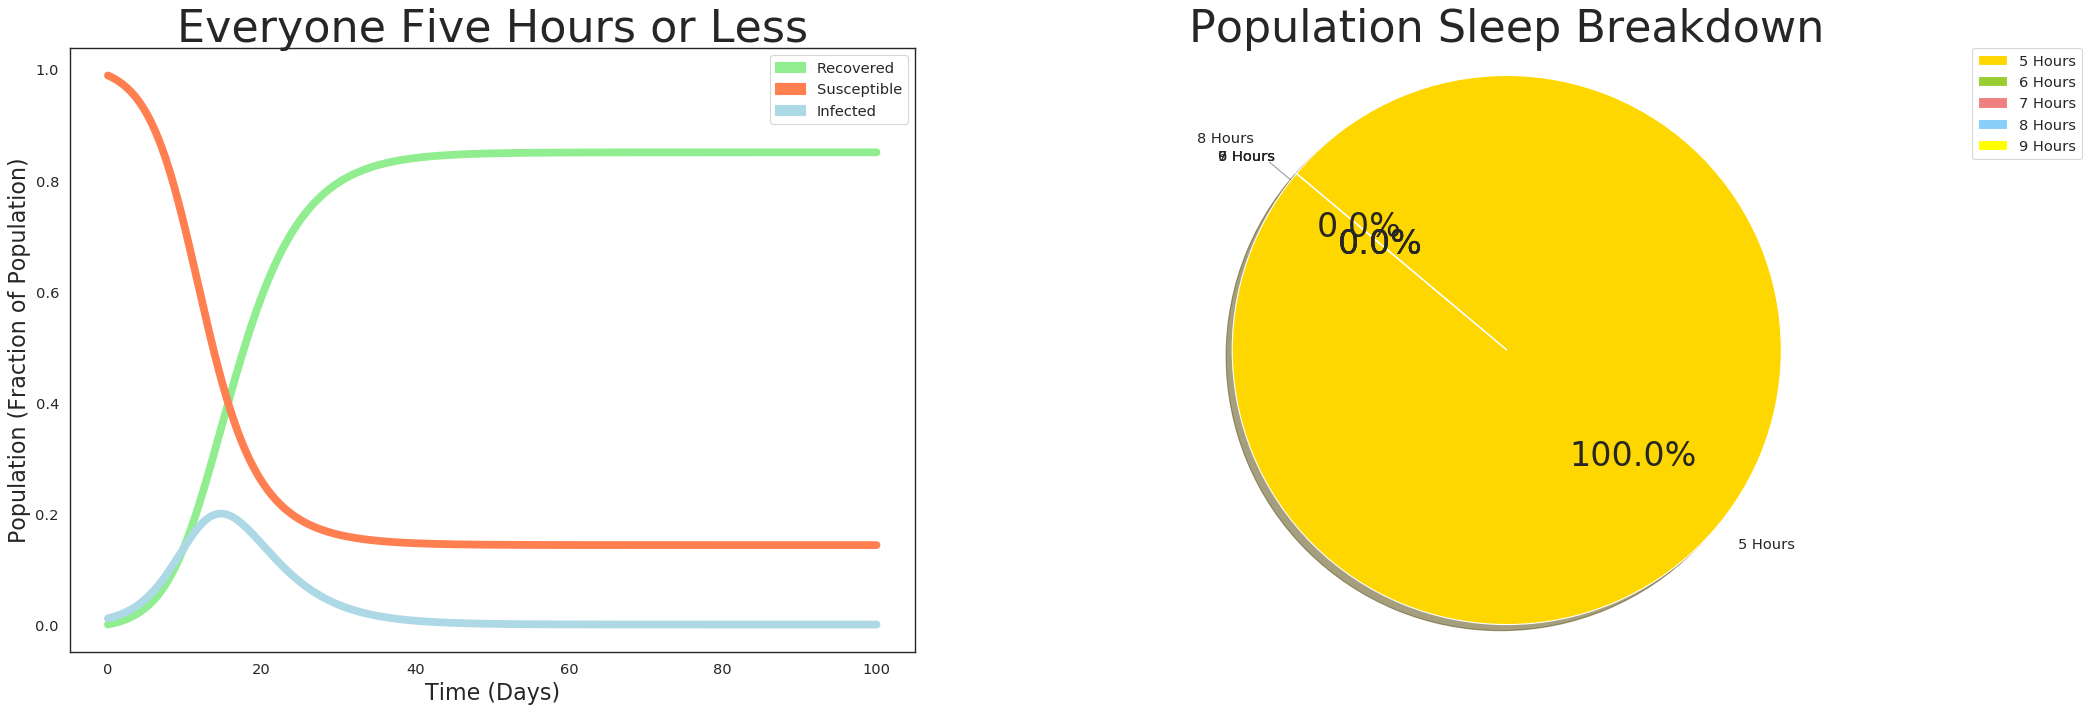

The total percentage of the population that was infected at any point was 84.58 %


In [90]:
sleepFive = 1
sleepSix = 0
sleepSeven = 0
sleepNine = 0
sleepEight = 1 - sleepFive - sleepSix - sleepSeven - sleepNine
system = make_system(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, initialInfected, beta5, beta6, beta7, beta8, beta9, beta, gamma)

results = run_simulation(system, update_func)
plot_results(results, sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, 'Everyone Five Hours or Less')
calc_total_infected(results)

# Application to Olin

The below graph shows a hypothetical outbreak at Olin. It uses the sleep values gathered from a survey of Olin students. The survey was taken by 84 people.

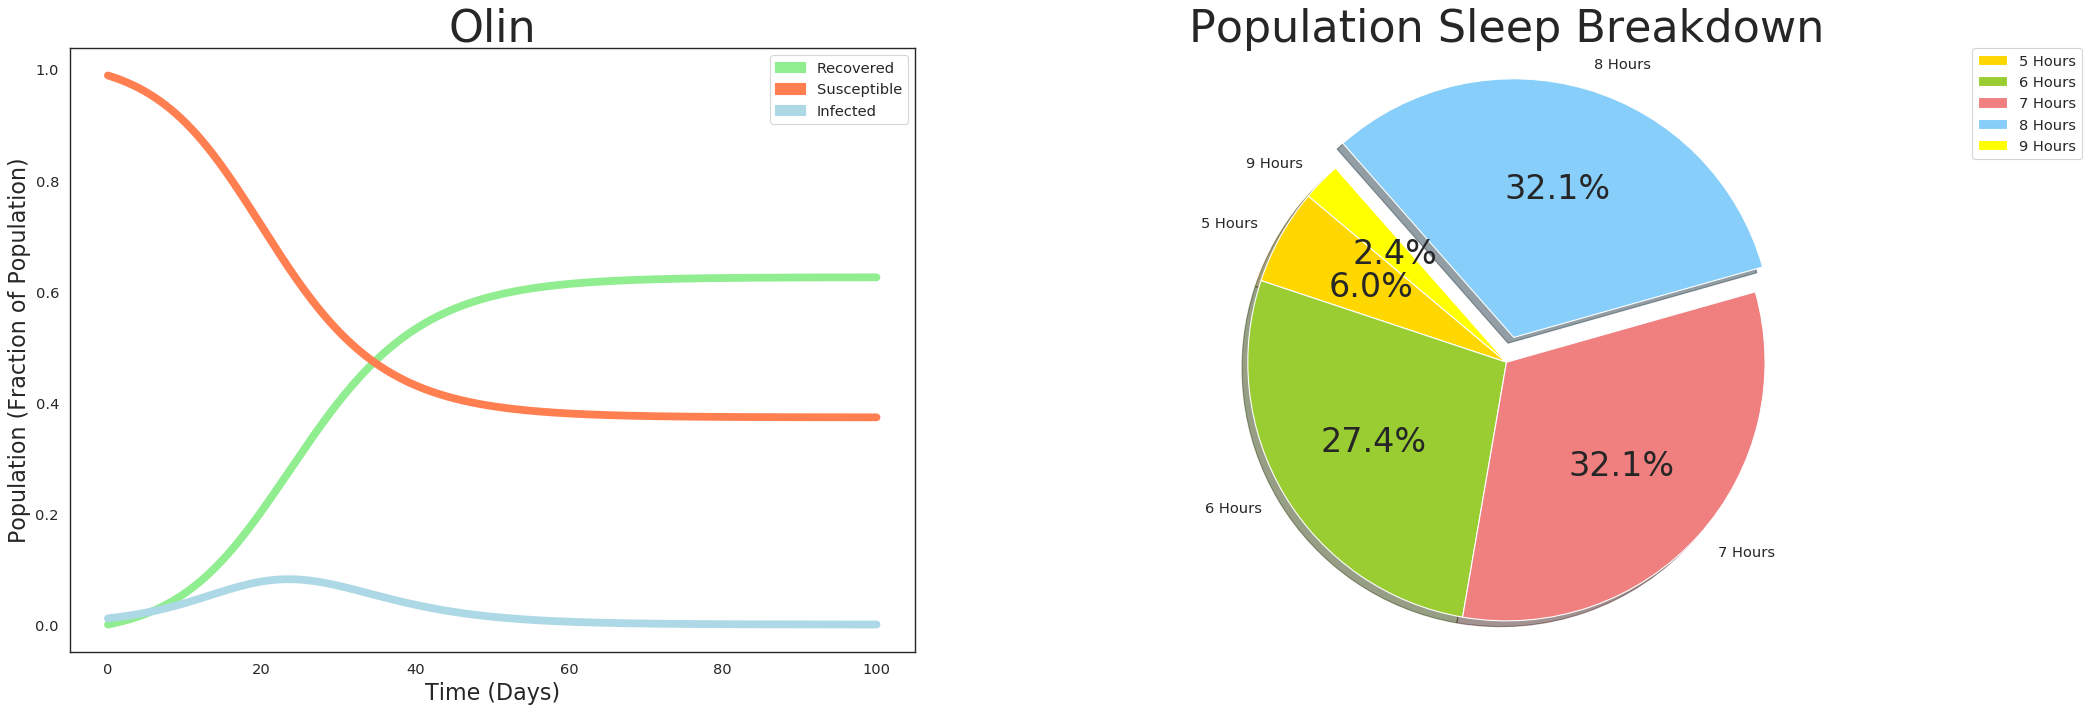

The total percentage of the population that was infected at any point was 61.57 %


In [91]:
sleepFive = .06
sleepSix = .274
sleepSeven = .321
sleepNine = .024
sleepEight = 1 - sleepFive - sleepSix - sleepSeven - sleepNine
system = make_system(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, initialInfected, beta5, beta6, beta7, beta8, beta9, beta, gamma)

results = run_simulation(system, update_func)
plot_results(results, sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, 'Olin')
calc_total_infected(results)

The below graph uses the same data as the result above, but instead of showing the whole SIR model, it just shows the fraction of each sleep group that is infected at any given time during the simulation. This is meant to help the reader see how the amount of sleep you get effects your own chance of getting sick, instead of looking at the collective view.

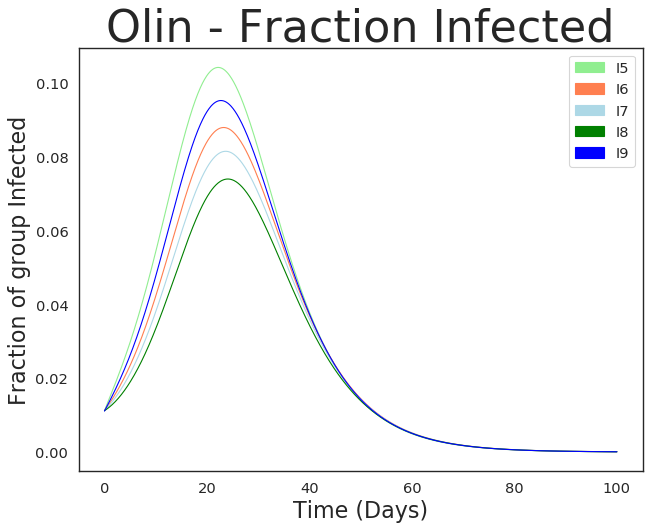

The percentage of the 5 hour of sleep population that was infected at any point was 4.5 %
The percentage of the 6 hour of sleep population that was infected at any point was 17.86 %
The percentage of the 7 hour of sleep population that was infected at any point was 19.58 %
The percentage of the 8 hour of sleep population that was infected at any point was 17.95 %
The percentage of the 9 hour of sleep population that was infected at any point was 1.69 %


In [92]:
analyze_results_infected(results, 'Olin')

The below graph shows a hypothetical outbreak at Olin where every student under eight hours of sleep got one more hour of sleep.

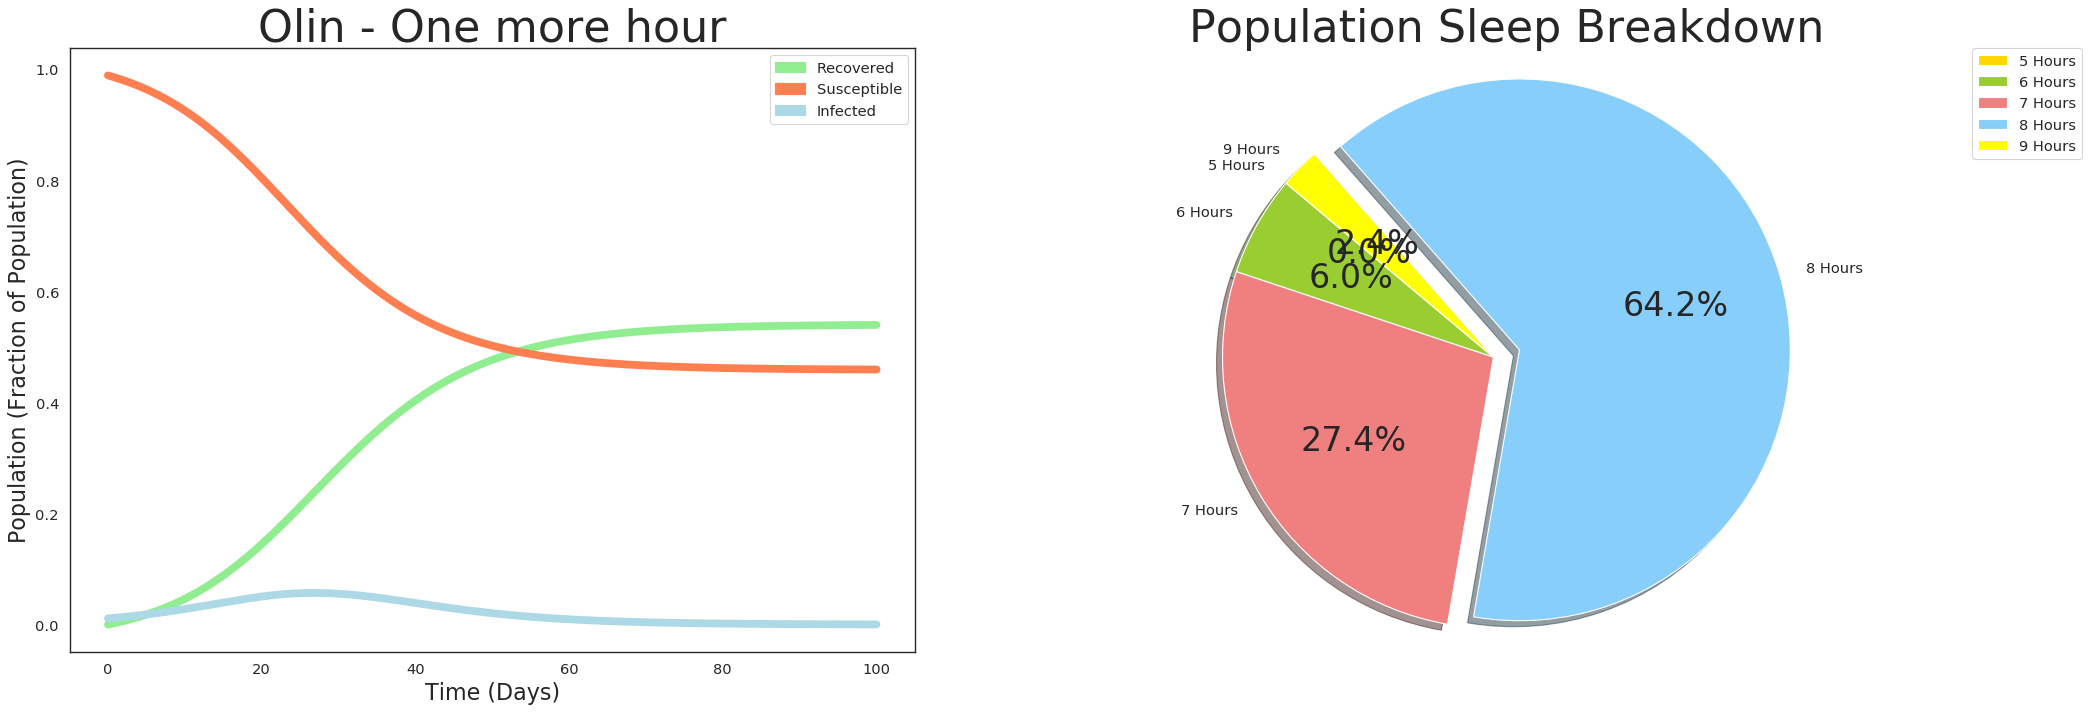

The total percentage of the population that was infected at any point was 52.959999999999994 %


In [93]:
sleepFive = 0
sleepSix = .06
sleepSeven = .274
sleepNine = .024
sleepEight = 1 - sleepFive - sleepSix - sleepSeven - sleepNine
system = make_system(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, initialInfected, beta5, beta6, beta7, beta8, beta9, beta, gamma)

results = run_simulation(system, update_func)
plot_results(results, sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, 'Olin - One more hour')
calc_total_infected(results)

The below graph shows the SIR model in a hypothetical Olin where every student got at least seven hours of sleep (any students under 7 hours will now get 7 hours).

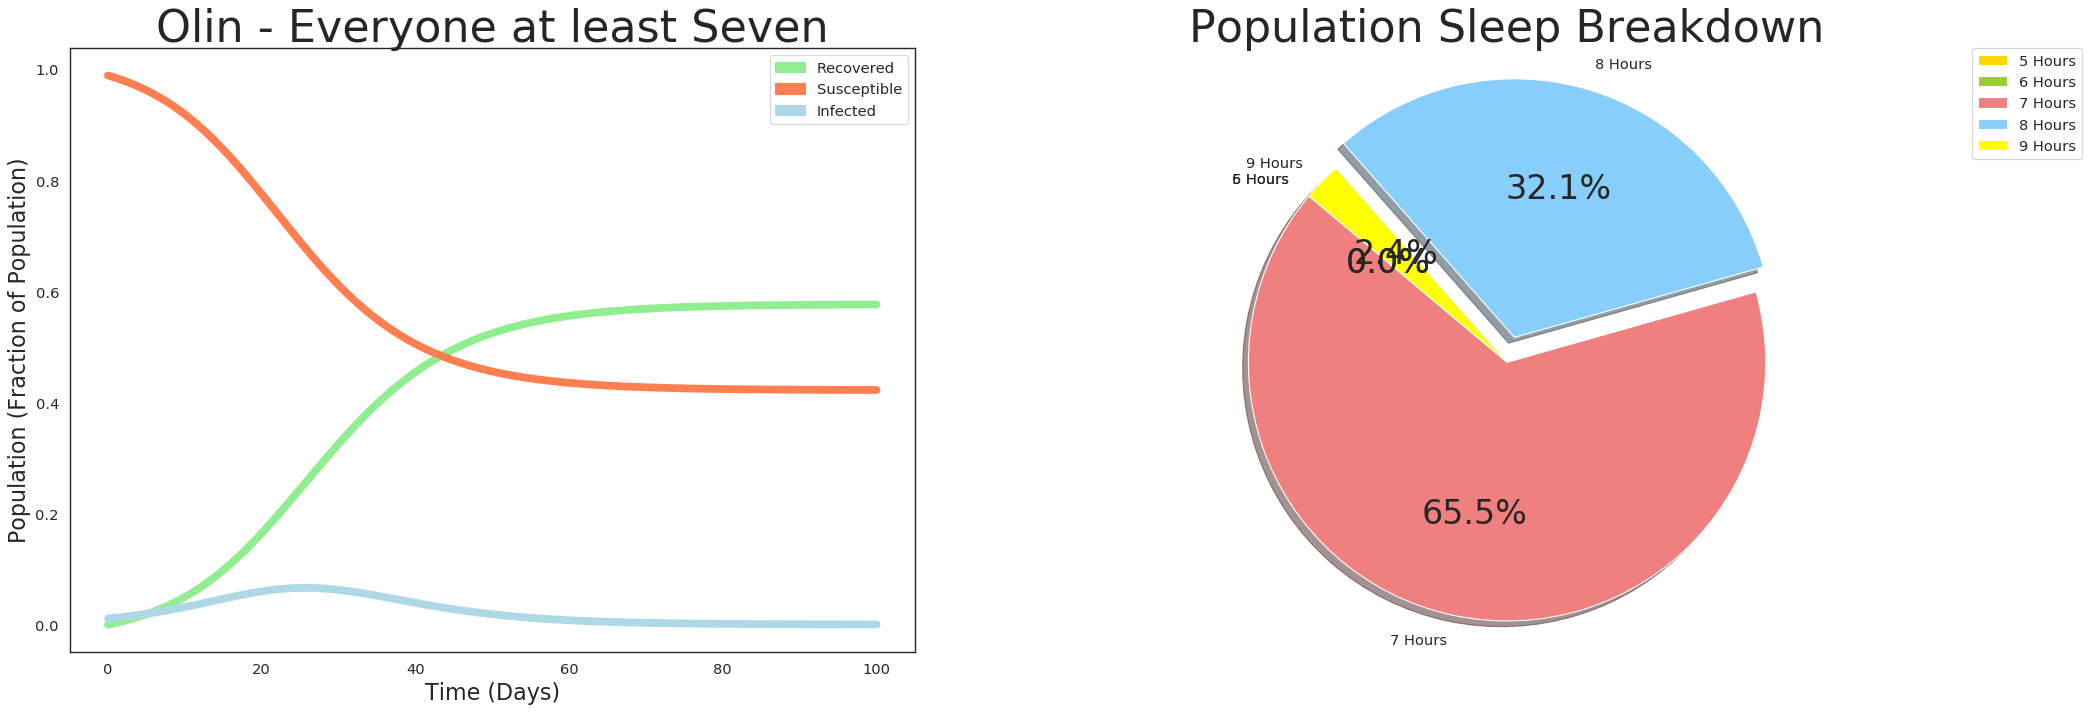

The total percentage of the population that was infected at any point was 56.65 %


In [94]:
sleepFive = 0
sleepSix = 0
sleepSeven = .655
sleepNine = .024
sleepEight = 1 - sleepFive - sleepSix - sleepSeven - sleepNine
system = make_system(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, initialInfected, beta5, beta6, beta7, beta8, beta9, beta, gamma)

results = run_simulation(system, update_func)
plot_results(results, sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, 'Olin - Everyone at least Seven')
calc_total_infected(results)

# Interpretation

Our results show that amount of sleep in a population definitely affects immune system ability and the spread of infection throughout a population.  If a fraction of the total population has an unhealthy amount of sleep, this group is more susceptible and causes a greater percentage of the population to become infected.  In an extreme situation where the entire population gets 5 hours or less per night, 84.57% become infected, whereas in an ideal situation of everyone getting 8 hours, the total percentage of infected people is 46.08%.  Using the data collected from the Olin population, we similarly found that increasing the number of hours made the percentage of infected population decrease.  The ideal amount of sleep is 8 hours - when there was a greater amount of people with 8 hours of sleep (in the "One more hour" case), 52.95% were infected.  In the "Everyone at least seven" case, the majority of the population got 7 hours, and 56.64% were infected.  

We believe our model is valid because it is based on the standard SIR model, which is widely accepted.  Our model was also based on real life data from  study that linked sleep with immune system ability, measuring cases of pneumonia. However, there are also some flaws within our model.  All sleep cases have the same recovery rate in our model, when in reality, you are more likely to get more sleep when you are sick.  This would have been a difficult case to implement and collect data for.  Additionally, our Olin model may not have been representative of the entire student body, as we only got 84 responses to the sleep survey.

# Abstract

In this project, we investigated the effects of a varying amount of sleep in a population on the spread of illness throughout that population.  We found that the prescence of groups with less than 8 hours of sleep caused a greater percentage of the population to become infected.  

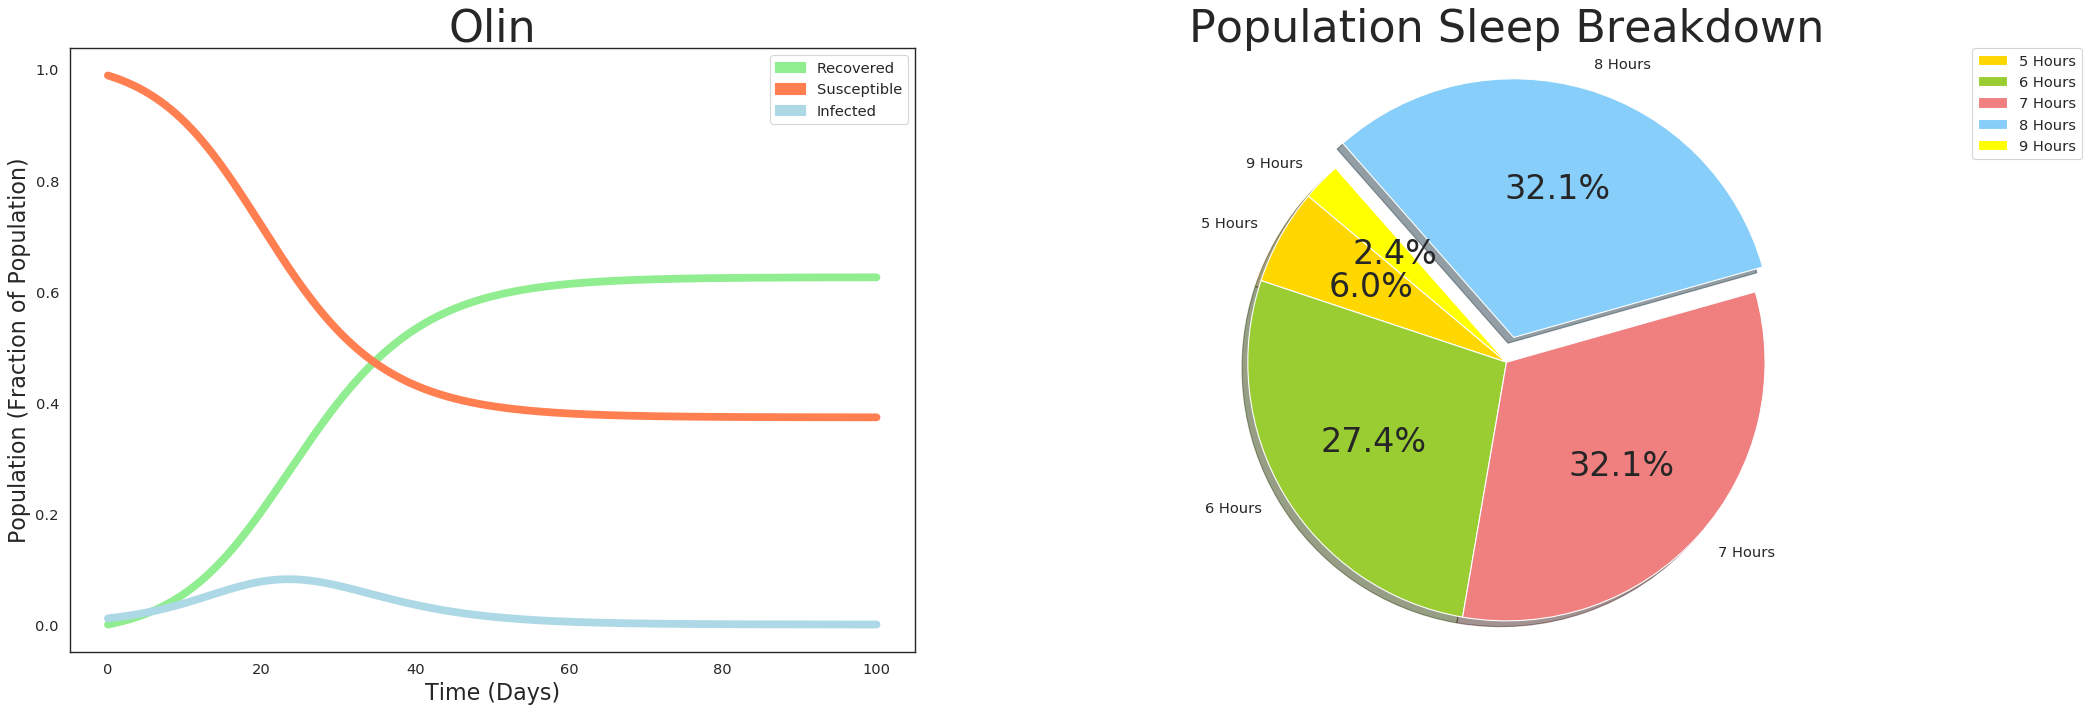

The total percentage of the population that was infected at any point was 61.57 %


In [95]:
sleepFive = .06
sleepSix = .274
sleepSeven = .321
sleepNine = .024
sleepEight = 1 - sleepFive - sleepSix - sleepSeven - sleepNine
system = make_system(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, initialInfected, beta5, beta6, beta7, beta8, beta9, beta, gamma)

results = run_simulation(system, update_func)
plot_results(results, sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, 'Olin')
calc_total_infected(results)

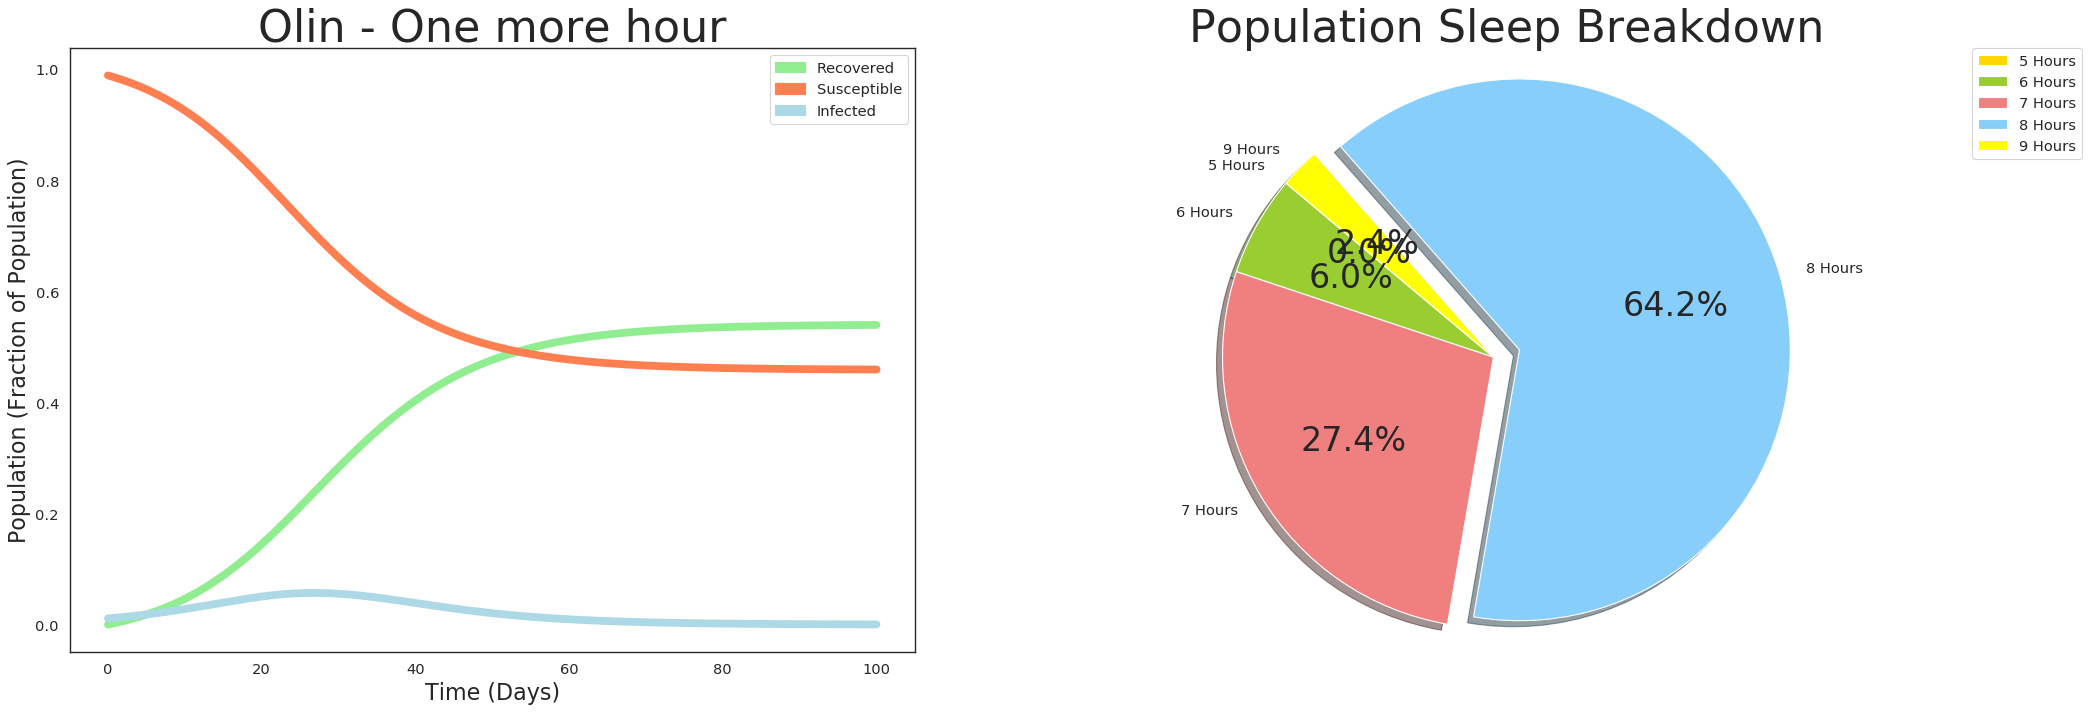

The total percentage of the population that was infected at any point was 52.959999999999994 %


In [96]:
sleepFive = 0
sleepSix = .06
sleepSeven = .274
sleepNine = .024
sleepEight = 1 - sleepFive - sleepSix - sleepSeven - sleepNine
system = make_system(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, initialInfected, beta5, beta6, beta7, beta8, beta9, beta, gamma)

results = run_simulation(system, update_func)
plot_results(results, sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, 'Olin - One more hour')
calc_total_infected(results)

According to our model, if everyone at Olin got one more hour of sleep, the number of people infected from a sickness would go down almost 14%. With our model's sample contact rate and recovery rate, this resulted in almost 9% fewer of the total population being infected (This would mean 34 students would be spared from being sick).

We believe these models to be valid because they are based on the standard SIR model. However, we did not implement separate recovery rates for each sleep case, which is a flaw in our model